Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 0.4015
Epoch 1: val_loss improved from inf to 0.37274, saving model to hl5_0100.h5
1/1 [==============================] - 1s 1s/step - loss: 0.4015 - val_loss: 0.3727
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 0.3855
Epoch 2: val_loss improved from 0.37274 to 0.35896, saving model to hl5_0100.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.3855 - val_loss: 0.3590
Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 0.3707
Epoch 3: val_loss improved from 0.35896 to 0.34603, saving model to hl5_0100.h5
1/1 [==============================] - 0s 64ms/step - loss: 0.3707 - val_loss: 0.3460
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 0.3568

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.34603 to 0.33377, saving model to hl5_0100.h5
1/1 [==============================] - 0s 63ms/step - loss: 0.3568 - val_loss: 0.3338
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 0.3435
Epoch 5: val_loss improved from 0.33377 to 0.32213, saving model to hl5_0100.h5
1/1 [==============================] - 0s 61ms/step - loss: 0.3435 - val_loss: 0.3221
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 0.3309
Epoch 6: val_loss improved from 0.32213 to 0.31091, saving model to hl5_0100.h5
1/1 [==============================] - 0s 65ms/step - loss: 0.3309 - val_loss: 0.3109
Epoch 7/3000
1/1 [==============================] - ETA: 0s - loss: 0.3187
Epoch 7: val_loss improved from 0.31091 to 0.30023, saving model to hl5_0100.h5
1/1 [==============================] - 0s 58ms/step - loss: 0.3187 - val_loss: 0.3002
Epoch 8/3000
1/1 [==============================] - ETA: 0s - loss: 0.3070
Epoch 8: val_loss improved from 0.3

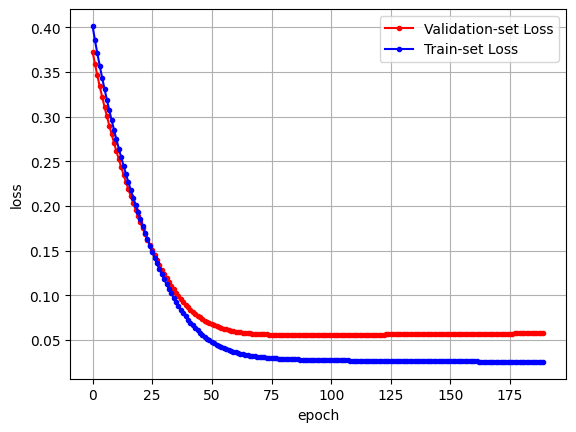

In [1]:
import scipy
import numpy
import h5py

#import tensorflow
from tensorflow import keras

#print('scipy ' + scipy.__version__)
#print('numpy ' + numpy.__version__)
#print('h5py ' + h5py.__version__)

#print('tensorflow ' + tensorflow.__version__)
#print('keras ' + keras.__version__)

import scipy.io

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
#from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Nadam
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.datasets import cifar10
#error발생: from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


train_x_data = scipy.io.loadmat('ml_detect_in_train.mat')
train_y_data = scipy.io.loadmat('ml_detect_out_train.mat')

train_x = train_x_data['in']
train_y = train_y_data['out']



val_x_data = scipy.io.loadmat('ml_detect_in_val.mat')
val_y_data = scipy.io.loadmat('ml_detect_out_val.mat')

val_x = val_x_data['in']
val_y = val_y_data['out']


# relu, tanh, elu, selu

model = Sequential()
model.add(Dense(units=100, input_dim=40, activation="selu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="selu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="selu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="selu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=100, activation="selu", kernel_initializer="normal"))
#model.add(Dropout(0.5))
model.add(Dense(units=4, activation="linear", kernel_initializer='normal'))


#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='sgd')

#model.fit(train_x, train_y, epochs=1000, batch_size=32)

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(patience = 100) # 조기종료 콜백함수 정의, 100 에포크 동안은 기다림
checkpoint_callback = ModelCheckpoint('hl5_0100.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#model.fit(train_x, train_y, epochs=3000, batch_size=32, validation_data=(val_x, val_y), callbacks=[early_stopping, checkpoint_callback])
history = model.fit(train_x, train_y, epochs=3000, batch_size=32, validation_data=(val_x, val_y), callbacks=[early_stopping, checkpoint_callback])


from keras.models import load_model
model_cp = load_model('hl5_0100.h5')

test_x_data = scipy.io.loadmat('ml_detect_in_test.mat')
test_y_data = scipy.io.loadmat('ml_detect_out_test.mat')
test_x = test_x_data['in']
test_y = test_y_data['out']

loss_and_metrics = model_cp.evaluate(test_x, test_y, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))


yhat=model_cp.predict(test_x)
scipy.io.savemat('hl5_0500_pred.mat',dict([('predict_ch', yhat) ]))

import matplotlib.pyplot as plt
import os

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()